# Course: Application of AI, Data Science and Machine Learning
# Lab 6: Artificial Neural Network

## 1. Implemet XOR function using simple dot product. Use Relu activation function. Assume that weights are given.
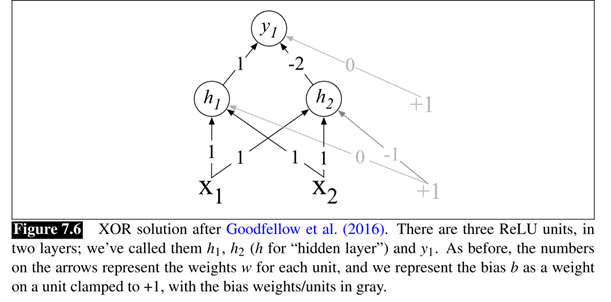

## 2. Build a deep learning model using Tensorflow. Use the data in 'Churn_Modelling.csv'. Use the steps mentioned in Lecture 13 to install Tensorflow and to build the model. 
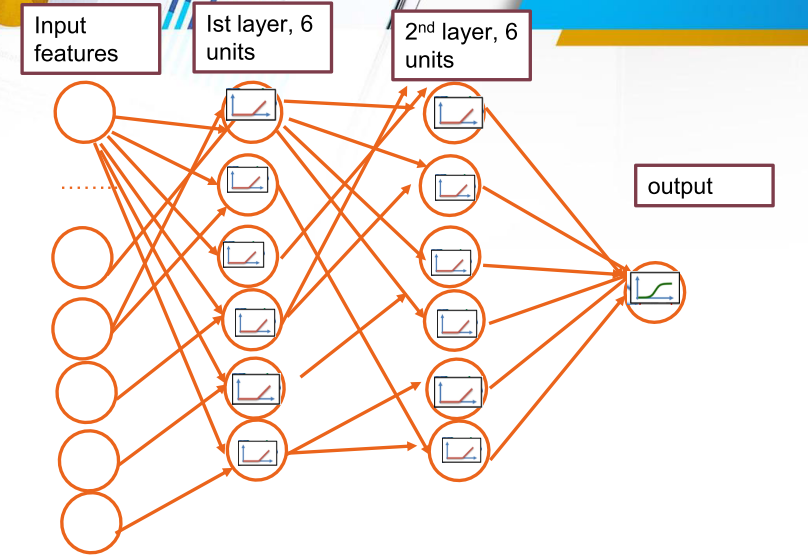

### Importing the libraries

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [21]:
tf.__version__

'2.3.0'

In [22]:
df = pd.read_csv("./Churn_Modelling.csv")
df.drop(["RowNumber", "CustomerId"], axis=1, inplace=True)
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
X=df.drop(["Surname", "Exited"], axis=1)
y=df["Exited"]
X, y

(      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 0             619    France  Female   42       2       0.00              1   
 1             608     Spain  Female   41       1   83807.86              1   
 2             502    France  Female   42       8  159660.80              3   
 3             699    France  Female   39       1       0.00              2   
 4             850     Spain  Female   43       2  125510.82              1   
 ...           ...       ...     ...  ...     ...        ...            ...   
 9995          771    France    Male   39       5       0.00              2   
 9996          516    France    Male   35      10   57369.61              1   
 9997          709    France  Female   36       7       0.00              1   
 9998          772   Germany    Male   42       3   75075.31              2   
 9999          792    France  Female   28       4  130142.79              1   
 
       HasCrCard  IsActiveMember  EstimatedSalary 

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [25]:
Categories=["Geography", "Gender"]
one_hot = OneHotEncoder()
ct = ColumnTransformer([("one_hot",
                         one_hot,
                         Categories)],
                         remainder="passthrough")
X = ct.fit_transform(X)

In [27]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,1.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,1.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,1.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,1.0,0.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,1.0,0.0,0.0,0.0,1.0,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,1.0,0.0,0.0,1.0,0.0,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,0.0,1.0,0.0,0.0,1.0,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [43]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100, activation="relu"))
ann.add(tf.keras.layers.Dense(units=100, activation="relu"))
ann.add(tf.keras.layers.Dense(units=100, activation="relu"))
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [44]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [45]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8183
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.8551
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3430 - accuracy: 0.8596
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8626
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8659
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3241 - accuracy: 0.8652
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3184 - accuracy: 0.8692
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3165 - accuracy: 0.8690
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.8723
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3073 - accura

In [46]:
y_preds = ann.predict(X_test)
y_preds

array([[8.1506443e-01],
       [8.0454350e-04],
       [1.4899497e-12],
       ...,
       [3.1365421e-09],
       [7.6455975e-01],
       [5.3785432e-10]], dtype=float32)

In [47]:
ann.evaluate(X_test, y_test)

63/63 [==============================] - 0s 961us/step - loss: 1.3816 - accuracy: 0.8200


[1.3816468715667725, 0.8199999928474426]